# Ames Housing — Notebook A3  
## Distribution Analysis & Transformation Readiness (Regression)

### Objective
In previous notebooks, we:
- understood the dataset
- handled missing values carefully

Now we answer:
1. How are our features distributed?
2. Which variables are skewed?
3. Are transformations required?
4. What options exist (without committing yet)?
5. What does `.fit()` actually mean in ML preprocessing?

⚠️ No scaling, no PCA, no modeling yet.

#### 1️⃣ Load Clean Dataset (After Missing Value Handling)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

DATA_PATH = "ames_housing_cleaned_v1.csv"
df = pd.read_csv(DATA_PATH)

df.shape

(2930, 82)

#### 2️⃣ Identify Numeric Features (Regression Context)

In [2]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove("SalePrice")  # target separated

len(numeric_features), numeric_features[:10]

(38,
 ['Order',
  'PID',
  'MS SubClass',
  'Lot Frontage',
  'Lot Area',
  'Overall Qual',
  'Overall Cond',
  'Year Built',
  'Year Remod/Add',
  'Mas Vnr Area'])

#### 3️⃣ TARGET VARIABLE FIRST — SalePrice (Observation Only)

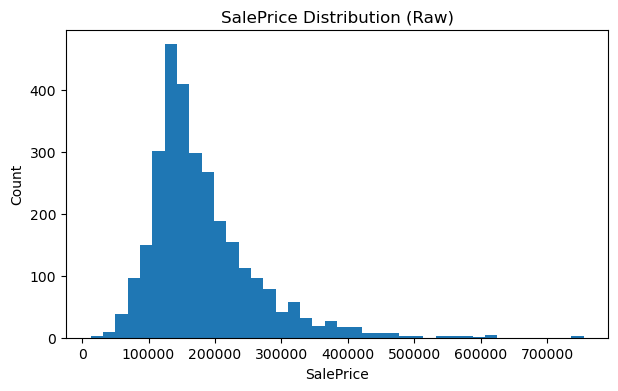

In [3]:
plt.figure(figsize=(7,4))
plt.hist(df["SalePrice"], bins=40)
plt.title("SalePrice Distribution (Raw)")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

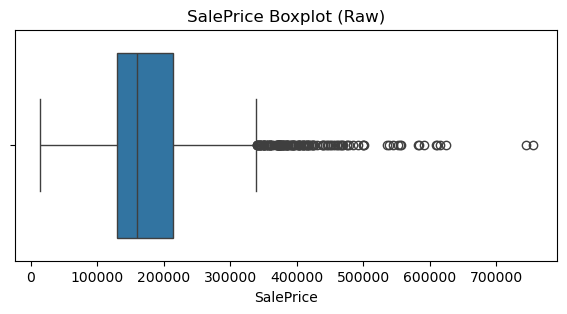

In [4]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df["SalePrice"])
plt.title("SalePrice Boxplot (Raw)")
plt.show()

In [6]:
print("SalePrice skewness:", skew(df["SalePrice"]))

SalePrice skewness: 1.7426073719460107


Interpretation (READ THIS CAREFULLY)

Distribution is right-skewed

Long tail of expensive houses

Mean > Median

Outliers are real (luxury properties)

⚠️ Important
We do NOT transform yet.

Why?

Log is not the only option

Box–Cox exists

Yeo–Johnson exists

Classification phase may need raw target

So we observe first.

4️⃣ Numeric Feature Distribution Scan (Diagnosis Phase)

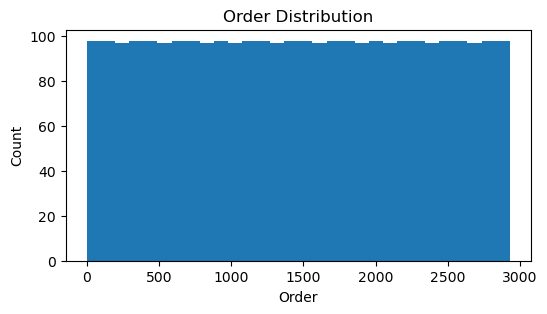

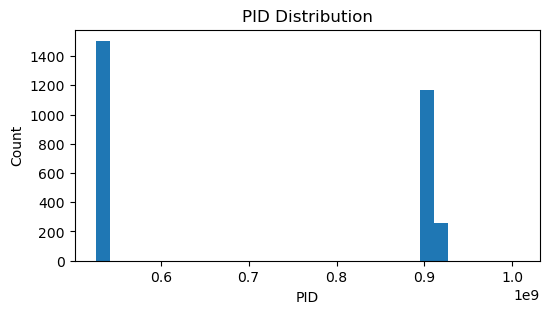

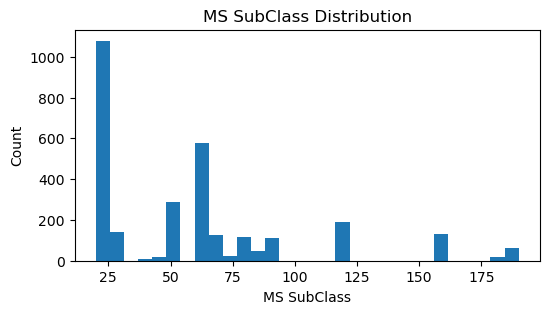

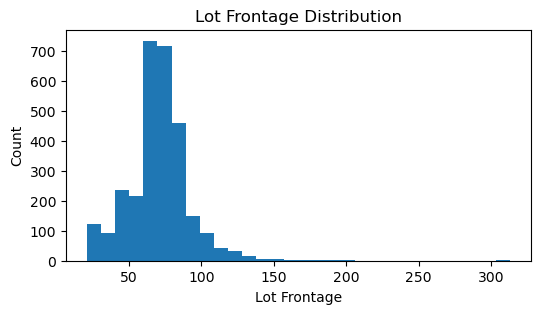

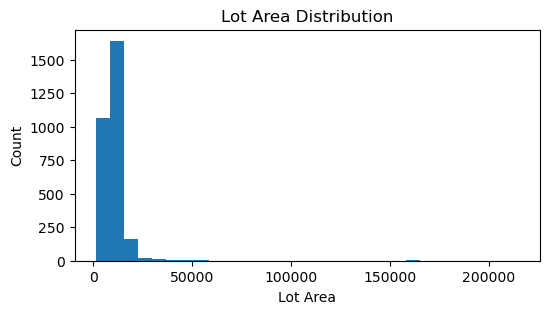

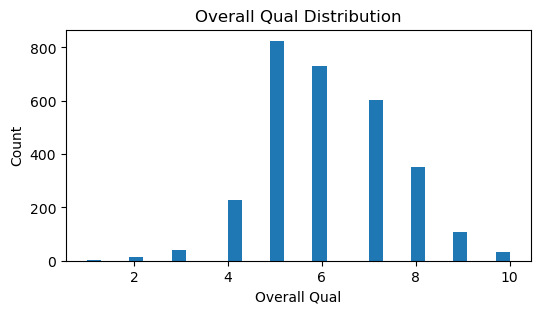

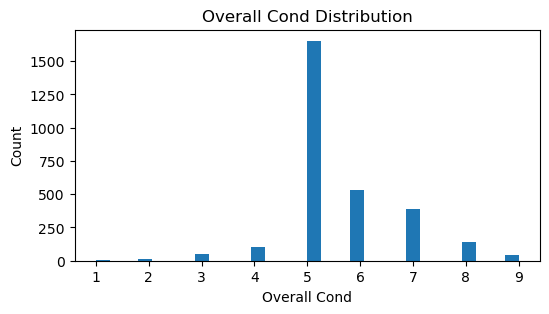

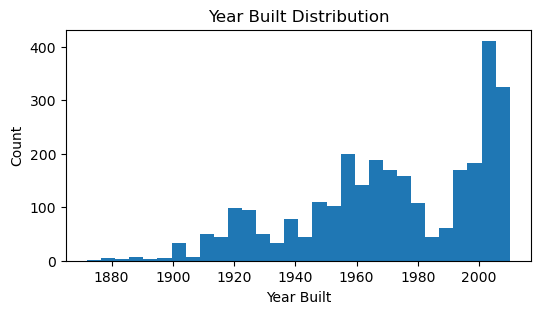

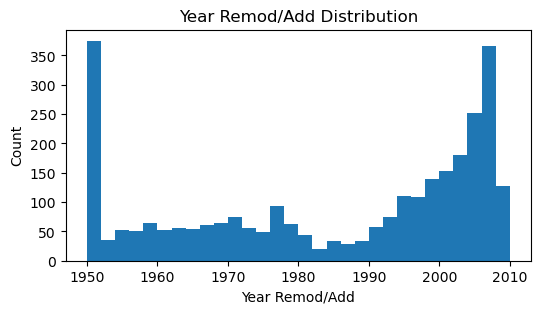

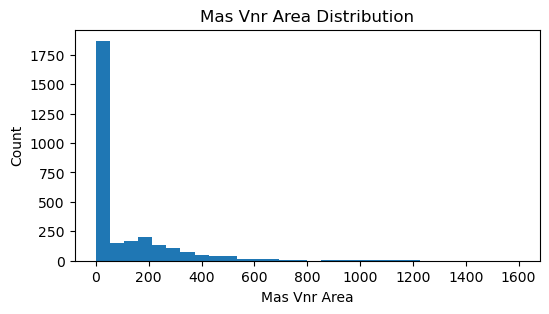

In [7]:
for col in numeric_features[:10]:   # first 10 for readability
    plt.figure(figsize=(6,3))
    plt.hist(df[col], bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [8]:
skewness_table = (
    df[numeric_features]
    .apply(skew)
    .sort_values(ascending=False)
)

skewness_table.head(10)

Misc Val           21.988523
Pool Area          16.930469
Lot Area           12.814334
Low Qual Fin SF    12.111957
3Ssn Porch         11.397956
Kitchen AbvGr       4.311616
BsmtFin SF 2        4.138674
Enclosed Porch      4.012390
Screen Porch        3.955441
Bsmt Half Bath      3.940371
dtype: float64

Interpretation

- Many numeric features are heavily right-skewed

- This is expected in housing data

- Skewness affects:

  - linear regression assumptions

  - PCA variance directions

  - distance-based methods

We now understand what needs attention, but not how yet.

5️⃣ Transformation OPTIONS (No Action Yet)

We introduce three transformation families conceptually.

Option 1: Log Transform
  - 𝑥′=log(1+x)

- Simple

- Interpretable

- Compresses large values

Option 2: Box–Cox
  - 𝑥′= (𝑥 ^ 𝜆 − 1) / 𝜆
	​


- Learns optimal λ

- Requires positive data

- More flexible

Option 3: Yeo–Johnson

- Works with zero / negative

- More general

- Less interpretable


We will compare these and not just apply blindly here.

## 6️⃣ VERY IMPORTANT CONCEPT — `.fit()` vs `.transform()`

This is the **exact right moment** to understand this properly.

Miss this → data leakage → fake accuracy → embarrassment in real projects.

---

### `.fit()`

**What it does:**
- Learns **statistics / parameters** from the data
- **Does NOT change** the data itself

Think of it as **studying the dataset**.

#### Examples of what `.fit()` learns:

- **Scaling**
  - Mean  
    $$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$$
  - Standard deviation  
    $$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}$$

- **Box–Cox Transformation**
  - Learns the optimal  
    $$\lambda$$

- **PCA (Principal Component Analysis)**
  - Learns:
    - Principal directions (eigenvectors)
    - Variance captured (eigenvalues)

> After `.fit()` → the model **knows something**, but the data is unchanged.

---

### `.transform()`

**What it does:**
- Applies the **learned statistics** to data
- **Actually changes** the data

Think of it as **using what was learned**.

#### Example (Standard Scaling):

$$x' = \frac{x - \mu}{\sigma}$$

Where:
- $$\mu$$ and $$\sigma$$ come from `.fit()`
- `.transform()` only applies them

> `.transform()` **never learns** — it only **uses stored values**.

---

### `.fit_transform()`

**What it is:**  
A **shortcut**

$$\texttt{.fit\_transform()} = \texttt{.fit()} + \texttt{.transform()}$$

Used when:
- You are **training**
- You are working on **one dataset**

---

### Real-World ML Rule (Non-Negotiable)

```text
Train data → fit + transform
Test data  → transform ONLY


## 7️⃣ Small Conceptual Demonstration (No Real Scaling Yet)

In [9]:
from sklearn.preprocessing import StandardScaler

sample = df[["Gr Liv Area"]].values

scaler = StandardScaler()

scaler.fit(sample)      # learns mean & std
transformed = scaler.transform(sample)   # applies them

scaler.mean_, scaler.scale_


(array([1499.69044369]), array([505.4226158]))

In [10]:
# Same operation in one step
scaler2 = StandardScaler()
sample_transformed = scaler2.fit_transform(sample)

Interpretation (CRITICAL)

- .fit() learns parameters

- .transform() applies parameters

- .fit_transform() is allowed only on training data

Later, during train-test split:

- .fit() → train only

- .transform() → test only

- This prevents data leakage.

8️⃣ Why We STOP Here (On Purpose)

We now know:

- which features are skewed

- that target is skewed

- that multiple transformation options exist

- how .fit() works conceptually

If we transform now without choosing carefully, we teach bad habits to us and the model as well 😂😂.

9️⃣ Notebook A3 Summary

We did:

- Distribution diagnosis

- Skewness quantification

- Transformation option comparison

- Introduced .fit() vs .transform()

We did NOT:

- Commit to any transformation

- Scale data

- Use PCA

- Build models